In [36]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from scipy.stats import kurtosis, skew

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix

from time import time


In [2]:
#Read the data

import pandas as pd
import warnings
warnings.filterwarnings("ignore")

data1=pd.read_csv(r"D:\ISI 2025\Class\Project\Ideas\On work\loan_data.csv")

data=data1.copy()
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


Independent Columns

In [3]:
# Information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [4]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [5]:
data.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [6]:
# convert to age to int format
data['person_age'] = data['person_age'].astype('int')
data['person_age'].dtypes

dtype('int32')

In [7]:
# Seperating the categorical and numerical variables

cat_cols = [var for var in data if data[var].dtypes == 'object']
num_cols = [var for var in data if data[var].dtypes != 'object']

print(f'Categorical columns: {cat_cols}')
print(f'Numerical columns: {num_cols}')

Categorical columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
Numerical columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']


In [8]:
cat_cols

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

In [9]:
# number of male and females

data['person_gender'].value_counts()

person_gender
male      24841
female    20159
Name: count, dtype: int64

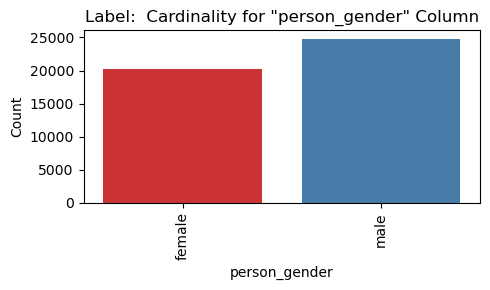

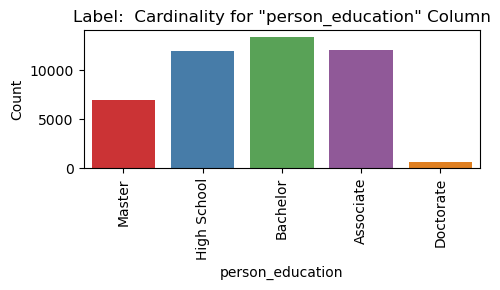

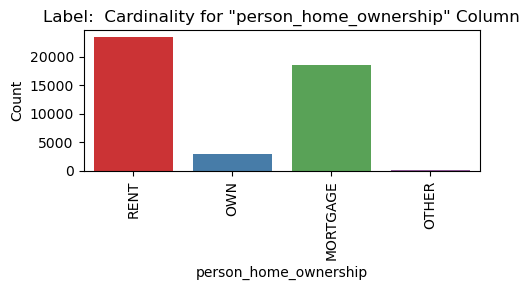

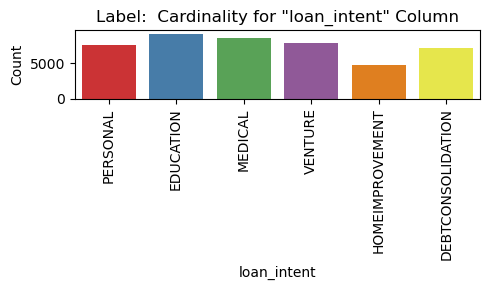

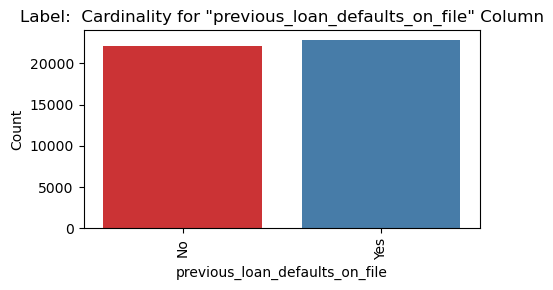

In [10]:
# Barchart for categorical variables

import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_column(dataframe, column):
    plt.figure(figsize=(5, 3))  #figure size
    sns.countplot(x=dataframe[column], palette="Set1")
    plt.title(f'Label:  Cardinality for "{column}" Column')
    plt.ylabel('Count')
    plt.xlabel(column)
    plt.xticks(rotation=90)  # Rotate x-axis labels vertically
    plt.tight_layout()  # Ensure there is no overlap between plots
    plt.show()

# Plotting
for col in cat_cols:
    plot_categorical_column(data, col)


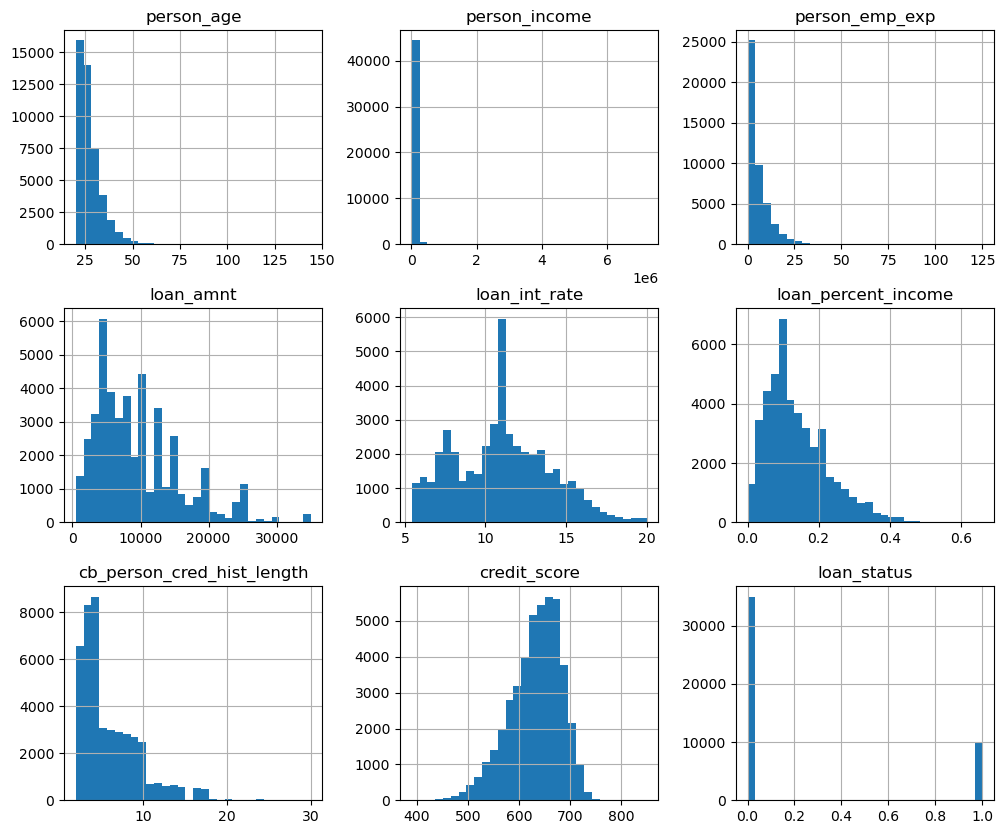

In [11]:
# Histograms for numerical features

data[num_cols].hist(bins=30, figsize=(12,10))
plt.show()

In [12]:
print(data.columns)

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')


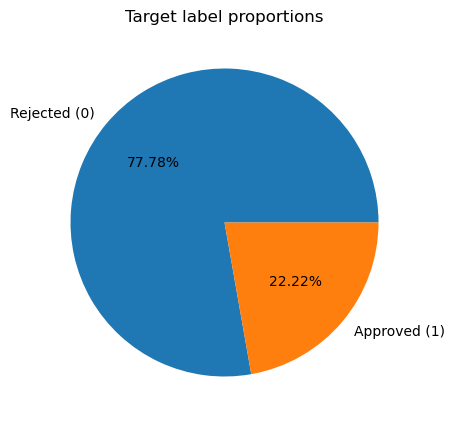

In [13]:
# Approved loan Vs non approved loan

label_prop = data['loan_status'].value_counts()

plt.figure(figsize=(6,5))
plt.pie(label_prop.values, labels=['Rejected (0)', 'Approved (1)'], autopct='%.2f%%')

plt.title('Target label proportions')
plt.show()

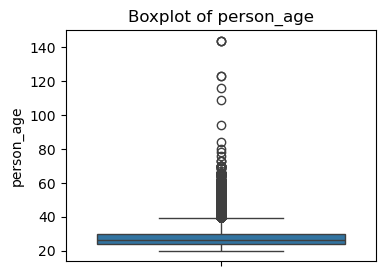

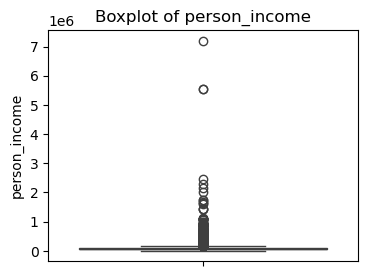

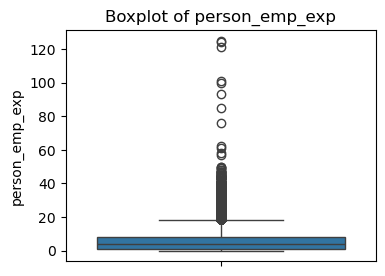

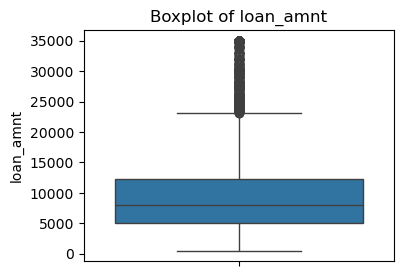

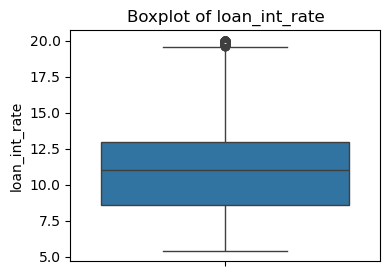

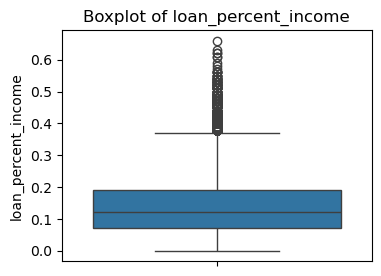

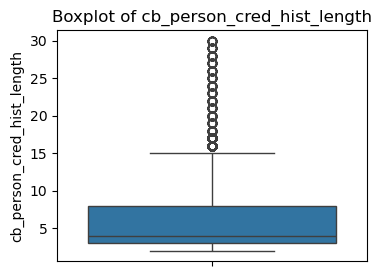

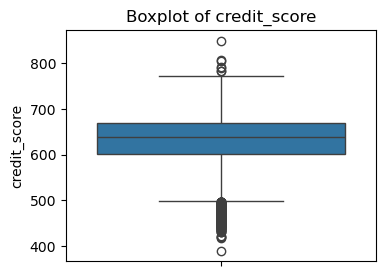

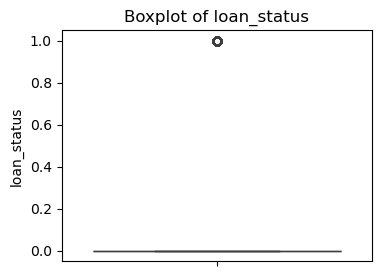

In [14]:
# Boxplot for numerical variables to see outliers

for col in num_cols:
    plt.figure(figsize=(4,3))
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

------------------------------

In [15]:
num_cols_withou_loan_status=num_cols[:-1]

In [16]:
mms = MinMaxScaler()
ss = StandardScaler()

data[num_cols_withou_loan_status] = mms.fit_transform(data[num_cols_withou_loan_status])

In [17]:
#Removal of outliers

def remove_outliers_iqr(data, column):

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the data
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

for col in num_cols_withou_loan_status:

    data = remove_outliers_iqr(data, col)

In [18]:
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,0.008065,female,High School,0.000595,0.000,OWN,0.014493,EDUCATION,0.392318,0.121212,0.000000,0.247826,Yes,0
5,0.008065,female,High School,0.000688,0.000,OWN,0.057971,VENTURE,0.117970,0.287879,0.000000,0.308696,No,1
9,0.008065,female,High School,0.000659,0.000,OWN,0.031884,VENTURE,0.639232,0.196970,0.035714,0.543478,No,1
19,0.032258,female,Master,0.000874,0.008,MORTGAGE,0.036232,EDUCATION,0.382030,0.181818,0.000000,0.628261,No,1
23,0.032258,female,Bachelor,0.000816,0.000,OWN,0.028986,PERSONAL,0.128258,0.166667,0.035714,0.456522,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44990,0.088710,male,Master,0.017911,0.072,RENT,0.342580,PERSONAL,0.788752,0.136364,0.178571,0.721739,No,1
44993,0.056452,female,High School,0.003825,0.032,RENT,0.130435,PERSONAL,0.713992,0.212121,0.107143,0.250000,No,1
44995,0.056452,male,Associate,0.005557,0.048,RENT,0.420290,MEDICAL,0.702332,0.469697,0.035714,0.554348,No,1
44997,0.104839,male,Associate,0.006804,0.056,RENT,0.065826,DEBTCONSOLIDATION,0.315501,0.075758,0.285714,0.604348,No,1


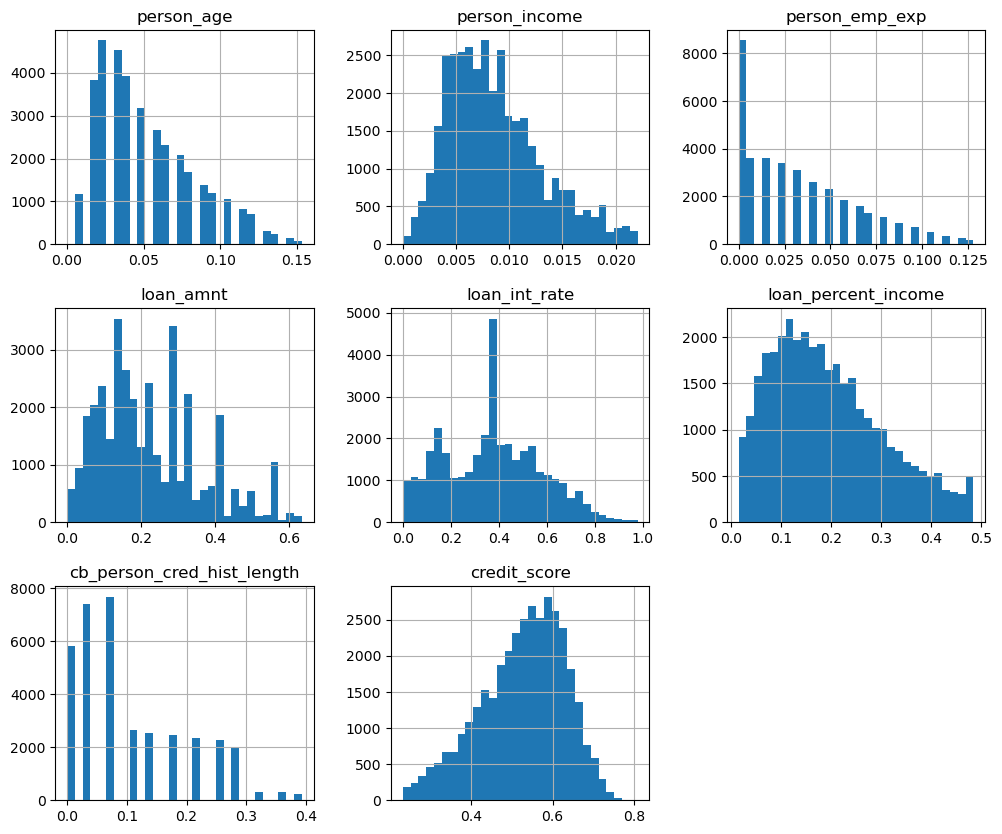

In [19]:
# Histograms for numerical features after removing outliers

data[num_cols_withou_loan_status].hist(bins=30, figsize=(12,10))
plt.show()

In [20]:
print('##### Skewness and kurtosis after outliers capping ##### \n')

for col in num_cols:

    print(f"Skewness of {col}: {skew(data[col])}")
    print(f"Kurtosis of {col}: {kurtosis(data[col])}")
    print()

##### Skewness and kurtosis after outliers capping ##### 

Skewness of person_age: 0.833322268987666
Kurtosis of person_age: -0.00043605452489980934

Skewness of person_income: 0.730796924400615
Kurtosis of person_income: 0.09278913167877878

Skewness of person_emp_exp: 0.8948101466153768
Kurtosis of person_emp_exp: 0.030638466220048954

Skewness of loan_amnt: 0.7377760398760494
Kurtosis of loan_amnt: -0.08951073594619041

Skewness of loan_int_rate: 0.1564321410509919
Kurtosis of loan_int_rate: -0.5745942326064082

Skewness of loan_percent_income: 0.6083765058950574
Kurtosis of loan_percent_income: -0.34569669883104526

Skewness of cb_person_cred_hist_length: 0.8476888837151245
Kurtosis of cb_person_cred_hist_length: -0.24995478694766238

Skewness of credit_score: -0.4771729590564867
Kurtosis of credit_score: -0.2871805784899313

Skewness of loan_status: 1.484016150979666
Kurtosis of loan_status: 0.20230393636850286



In [21]:
data[cat_cols].dtypes

person_gender                     object
person_education                  object
person_home_ownership             object
loan_intent                       object
previous_loan_defaults_on_file    object
dtype: object

In [22]:
data[cat_cols]

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
1,female,High School,OWN,EDUCATION,Yes
5,female,High School,OWN,VENTURE,No
9,female,High School,OWN,VENTURE,No
19,female,Master,MORTGAGE,EDUCATION,No
23,female,Bachelor,OWN,PERSONAL,Yes
...,...,...,...,...,...
44990,male,Master,RENT,PERSONAL,No
44993,female,High School,RENT,PERSONAL,No
44995,male,Associate,RENT,MEDICAL,No
44997,male,Associate,RENT,DEBTCONSOLIDATION,No


In [23]:
#Label Encoding

data2=data.copy()

# One-hot encoding for categorical columns
data_encoded = pd.get_dummies(data2[cat_cols], drop_first=True)

# Convert boolean columns to integers (1 for True, 0 for False)
data_encoded = data_encoded.astype(int)

# Drop the original categorical columns and add the new one-hot encoded columns
data2 = data2.drop(columns=cat_cols).join(data_encoded)

In [24]:
pd.set_option('display.max_columns', None)

data2


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
1,0.008065,0.000595,0.000,0.014493,0.392318,0.121212,0.000000,0.247826,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1
5,0.008065,0.000688,0.000,0.057971,0.117970,0.287879,0.000000,0.308696,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0
9,0.008065,0.000659,0.000,0.031884,0.639232,0.196970,0.035714,0.543478,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0
19,0.032258,0.000874,0.008,0.036232,0.382030,0.181818,0.000000,0.628261,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
23,0.032258,0.000816,0.000,0.028986,0.128258,0.166667,0.035714,0.456522,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44990,0.088710,0.017911,0.072,0.342580,0.788752,0.136364,0.178571,0.721739,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0
44993,0.056452,0.003825,0.032,0.130435,0.713992,0.212121,0.107143,0.250000,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
44995,0.056452,0.005557,0.048,0.420290,0.702332,0.469697,0.035714,0.554348,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0
44997,0.104839,0.006804,0.056,0.065826,0.315501,0.075758,0.285714,0.604348,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0


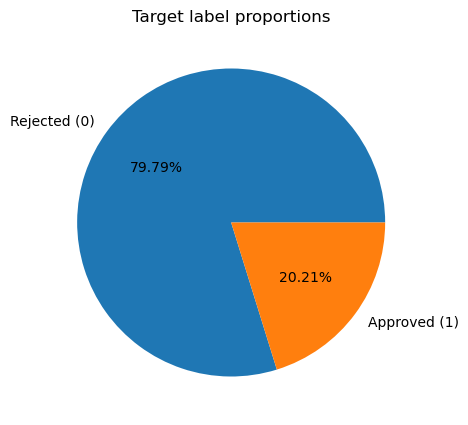

In [25]:
# Approved loan Vs non approved loan

label_prop = data2['loan_status'].value_counts()

plt.figure(figsize=(6,5))
plt.pie(label_prop.values, labels=['Rejected (0)', 'Approved (1)'], autopct='%.2f%%')

plt.title('Target label proportions')
plt.show()

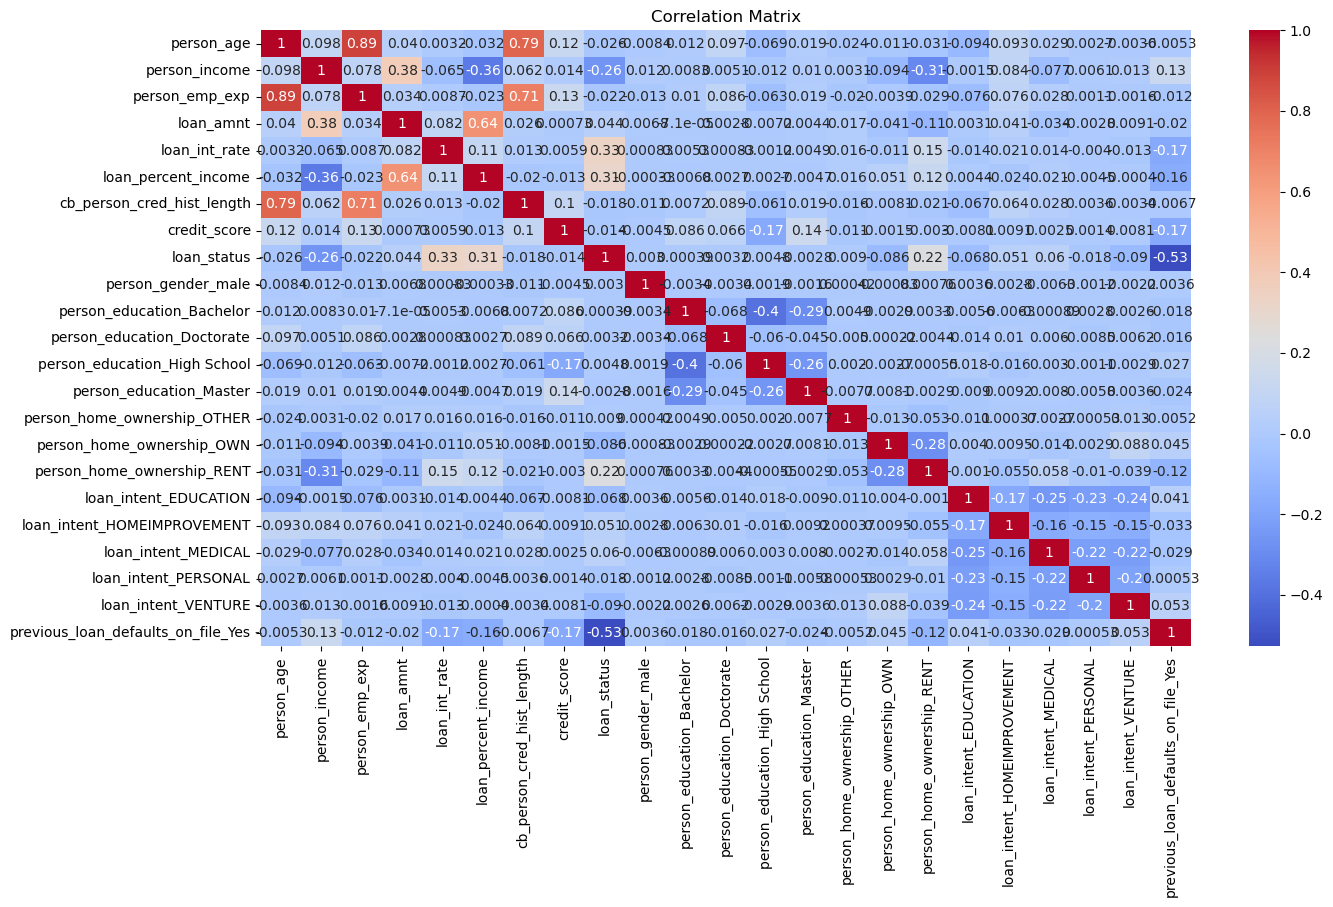

In [26]:
#Correlation Map

plt.figure(figsize=(15, 8))
sns.heatmap(data2.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

-------------------------------------------

--------------

In [28]:
X=data2.drop(columns=['loan_status'])

In [45]:
Y=data2['loan_status'].map({1:'approved', 0:'non-approved'})
Y

1        non-approved
5            approved
9            approved
19           approved
23       non-approved
             ...     
44990        approved
44993        approved
44995        approved
44997        approved
44999        approved
Name: loan_status, Length: 36059, dtype: object

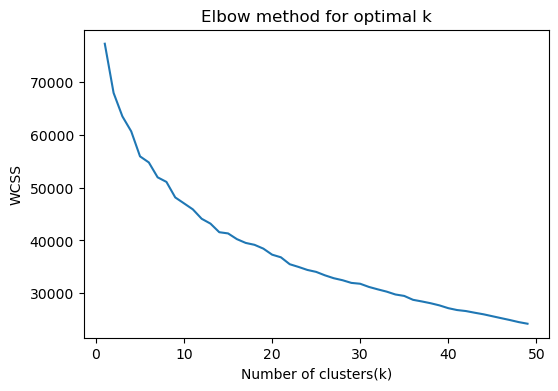

In [30]:
# WCSS Using K Means

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Wcss_values_=[]
k_values_=[]

for k in range(1,50):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    Wcss_values_range=round(kmeans.inertia_,4)
    k_values_.append(k)
    Wcss_values_.append(Wcss_values_range)

# Plot k values vs. WCSS
plt.figure(figsize=(6,4))
plt.plot(k_values_,Wcss_values_)
plt.title("Elbow method for optimal k")
plt.xlabel("Number of clusters(k)")
plt.ylabel("WCSS")
plt.show()

In [31]:
# There is no inherent cluster at k=2

In [34]:
##import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

from sklearn.cluster import KMeans

# Define the KMeans model with 3 clusters and 5 initializations (nstart=5 equivalent)
kmeans = KMeans(n_clusters=2, n_init=5)

# Fit the model
kmeans.fit(X)

# Add the cluster labels to the original dataset
data2['cluster'] = kmeans.labels_

data2

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes,cluster
1,0.008065,0.000595,0.000,0.014493,0.392318,0.121212,0.000000,0.247826,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
5,0.008065,0.000688,0.000,0.057971,0.117970,0.287879,0.000000,0.308696,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
9,0.008065,0.000659,0.000,0.031884,0.639232,0.196970,0.035714,0.543478,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
19,0.032258,0.000874,0.008,0.036232,0.382030,0.181818,0.000000,0.628261,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
23,0.032258,0.000816,0.000,0.028986,0.128258,0.166667,0.035714,0.456522,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44990,0.088710,0.017911,0.072,0.342580,0.788752,0.136364,0.178571,0.721739,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1
44993,0.056452,0.003825,0.032,0.130435,0.713992,0.212121,0.107143,0.250000,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
44995,0.056452,0.005557,0.048,0.420290,0.702332,0.469697,0.035714,0.554348,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1
44997,0.104839,0.006804,0.056,0.065826,0.315501,0.075758,0.285714,0.604348,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [46]:
# Create the contingency table (cluster vs species)
contingency_table = pd.crosstab(data2['cluster'], Y)

print(contingency_table)

loan_status  approved  non-approved
cluster                            
0                1912          7401
1                5374         21372


Obsevation: K MEans gives very poor result. No visible cluster is formed for k=2

#### K-MEDOID

In [48]:
# Convert DataFrame to NumPy array
X_array = X.values
    
# Randomly initialize medoids
initial_medoids=np.random.choice(len(X),2,replace=False).tolist()

# Perform PAM clustering
PAM = kmedoids(X_array, initial_medoids)
PAM.process()

# Get medoids
medoids = PAM.get_medoids()

# Get Clusters
clusters = PAM.get_clusters()

clusters

[[0,
  4,
  6,
  8,
  9,
  11,
  12,
  13,
  16,
  17,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  30,
  31,
  32,
  34,
  36,
  37,
  38,
  40,
  41,
  43,
  44,
  45,
  46,
  50,
  51,
  52,
  53,
  54,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  69,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  83,
  84,
  85,
  87,
  88,
  102,
  105,
  109,
  112,
  119,
  120,
  125,
  128,
  129,
  130,
  132,
  134,
  136,
  142,
  145,
  146,
  149,
  154,
  156,
  157,
  158,
  159,
  160,
  162,
  164,
  173,
  184,
  187,
  188,
  195,
  196,
  198,
  205,
  206,
  211,
  214,
  220,
  232,
  241,
  244,
  246,
  247,
  248,
  250,
  251,
  254,
  258,
  261,
  262,
  263,
  269,
  270,
  275,
  281,
  282,
  284,
  285,
  286,
  287,
  290,
  293,
  295,
  296,
  297,
  299,
  301,
  305,
  311,
  313,
  316,
  318,
  320,
  325,
  326,
  328,
  329,
  330,
  333,
  334,
  336,
  337,
  341,
  343,
  346,
  347,
  349,
  352,
  354,
  356,
  359,
  360,
  361,
 

In [49]:
l=[]
for i in range(len(X)):
    if i in clusters[0]:
        l.append(0)
    elif i in clusters[1]:
        l.append(1)

In [50]:
# Create the contingency table (cluster vs species)
contingency_table = pd.crosstab(l, Y)

print(contingency_table)

loan_status  approved  non-approved
row_0                              
0                 953         17505
1                6333         11268


In [51]:
# There is no cluster for K=2

-----------------